In [1]:
from pyopenms import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage import io



Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [4]:
import glob
files = glob.glob('/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/\
003-FileConverter-out/*.mzML')


In [ ]:

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def image_creator(filename_in):
    RT_the_whole =[]
    X =[]
    count_seven_second = 0
    exp = MSExperiment()
    MzMLFile().load(filename_in, exp)
    mg = np.zeros((1143, 2000))
    for  count, spec in enumerate(exp):
        if count>0 and spec.getRT()<7999 and spec.getMSLevel()==1 :
            count_seven_second +=1
            RT =spec.getRT()
            mz, intensity = spec.get_peaks()
            x= int(RT/7)
            RT_the_whole.append(RT)
            X.append(x)
            for c, mz_ in enumerate(mz):
                y = int(round_of_rating(mz_,1)*1)
                mg[x,y] += intensity[c]

                        
            
    #plt.imshow(mg,cmap="seismic",vmin=-8, vmax=8)
    return mg, RT_the_whole, X


import scipy.misc
image1,RT_the_whole1, X1 = image_creator(files[0])
image2, RT_the_whole2, X2= image_creator(files[1])
image3, RT_the_whole3, X3 = image_creator(files[2])
image4, RT_the_whole4, X4 = image_creator(files[3])
image5, RT_the_whole5, X5 = image_creator(files[4])
image6, RT_the_whole6, X6 = image_creator(files[5])
image7, RT_the_whole7, X7 = image_creator(files[6])
image8, RT_the_whole8, X8 = image_creator(files[7])
image9, RT_the_whole9, X9 = image_creator(files[8])
image10, RT_the_whole10, X10= image_creator(files[9])


In [6]:
path = '/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140_rate_1/'

In [7]:
Images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10 ]
Names = files
max_Images_intensity = np.max(Images)
Image_new=[]
for image, name in zip(Images, files):
    np.save( os.path.join( path,name), image)
    image = 255*(image/max_Images_intensity)
    image = image.astype(np.uint8)
    io.imsave(os.path.join(path,name+'.png'), image)
    Image_new.append(image)


In [ ]:
Images_mp = [image1, image5, image6,   image9, image10]
RT_mp = [RT_the_whole1, RT_the_whole5,RT_the_whole6, RT_the_whole9 ,RT_the_whole10]
X_mp = [X1, X5, X6, X9, X10]
Images_nomp = [image2,image3, image4, image7, image8]
RT_nomp = [RT_the_whole2, RT_the_whole3,RT_the_whole4, RT_the_whole7,RT_the_whole8]
X_nomp = [X2, X3, X4,X7, X8]

In [9]:
def MZ_RT_min_max(filename_in):
    MZ_min=[]
    MZ_max=[]
    In_min = []
    In_max =[]
    RT_the_whole =[]
    Nr_spectra=0
    exp = MSExperiment()
    MzMLFile().load(filename_in, exp)
    for  spec in exp:
        if spec.getMSLevel()==1 :
            RT =spec.getRT()
            RT_the_whole.append(RT)
            Nr_spectra +=1
            mz, intensity = spec.get_peaks()
            if np.size(mz)!=0:
                MZ_min.append(min(mz))
                MZ_max.append(max(mz))
                In_max.append(max(intensity))
                In_min.append(min(intensity))
    return  min(RT_the_whole),max(RT_the_whole), min(MZ_min), max(MZ_max), Nr_spectra, max(In_max), min(In_min)


In [10]:
MZ_RT_min_max(files[9])



(1.001,
 14404.3,
 350.020751953125,
 1998.40673828125,
 11758,
 2597.325,
 2.7755576e-17)

In [11]:
print('RT_min1, RT_max1 ,MZ_min1, MZ_max1 are, Number of Spectra: ')
print(files[0])
print( MZ_RT_min_max(files[0]))
print(files[1]) 
print( MZ_RT_min_max(files[1]))
print(files[2])
print( MZ_RT_min_max(files[2]))
print(files[3])
print( MZ_RT_min_max(files[3]))
print(files[4])
print( MZ_RT_min_max(files[4]))
print(files[5])
print(MZ_RT_min_max(files[5]))
print(files[6])
print( MZ_RT_min_max(files[6]))
print(files[7])
print( MZ_RT_min_max(files[7]))
print(files[8])
print( MZ_RT_min_max(files[8]))
print(files[9])
print( MZ_RT_min_max(files[9]))


RT_min1, RT_max1 ,MZ_min1, MZ_max1 are, Number of Spectra: 
/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/003-FileConverter-out/50ugserum_MPrep_INCL_5ul240run_Subj1_inj1-s1.mzML
(1.005, 14404.5, 350.0242919921875, 1997.4017333984375, 11603, 2638.4946, 2.7755576e-17)
/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/003-FileConverter-out/50ugserum_noMP_INCL_5ul240run_Subj1_inj1-s1.mzML
(1.003, 14403.8, 350.0342712402344, 1998.6015625, 9712, 3049.2717, 5.551115e-17)
/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/TOPPAS_out/003-FileConverter-out/50ugserum_noMP_INCL_5ul240run_Subj3_inj1-s1.mzML
(1.001, 14403.7, 350.01837158203125, 1997.659912109375, 10137, 3092.5046, 2.7755576e-17)
/Users/siravani/Documents/LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis 

In [123]:

def plot_spike_contrast(ts,te, mz, rate, ylim):

    ts=int(ts*60)
    te = int(te*60)
    mz = mz
    rate = rate
    fig , (ax1,ax2) = plt.subplots(1,2, figsize = ( 9,3))
    ax1.set_title('mz='+str(mz)+ '(MP)')
    ax1.set(xlabel='RT', ylabel= 'Intensity')
    ax1.set_ylim(top=ylim)
    for image, RT in zip (Images_mp, RT_mp):
        xmin= int(np.floor( RT[find_nearest(RT,ts)]/7 ))
        xmax= int(np.floor( RT[find_nearest(RT,te)]/7 ))
        ax1.plot(range(xmin,xmax),\
             image[xmin:xmax,int(round_of_rating(mz,rate)*rate)])
        ax1.set_xticks(np.arange(xmin,xmax,7))
        mylist = np.arange(xmin,xmax,7)
        mystring = [str(int(i/7)) for i in mylist]
        ax1.set_xticklabels(mystring)

    ax2.set_title('mz='+str(mz)+ '(noMP)')
    ax2.set(xlabel='RT', ylabel= 'Intensity')
    ax2.set_ylim(top=ylim)
    for image, RT in zip (Images_nomp, RT_nomp):
        xmin= int(np.floor( RT[find_nearest(RT,ts)]/7 ))
        xmax= int(np.floor( RT[find_nearest(RT,te)]/7 ))
        ax2.plot(range(xmin,xmax),\
             image[xmin:xmax,int(round_of_rating(mz,rate)*rate)-])
        ax2.set_xticks(np.arange(xmin,xmax,7))
        mylist = np.arange(xmin,xmax,7)
        mystring = [str(int(i/7)) for i in mylist]
        ax2.set_xticklabels(mystring)
    name =str(mz)+str('_')+str(ts)+'.png'
    plt.savefig(name)


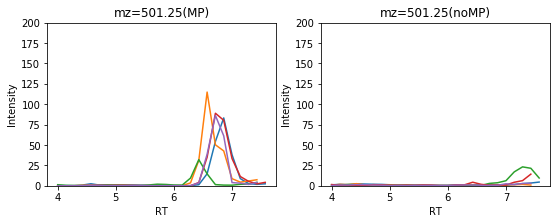

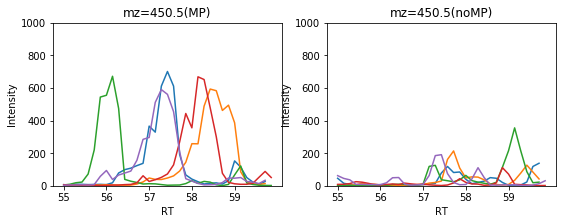

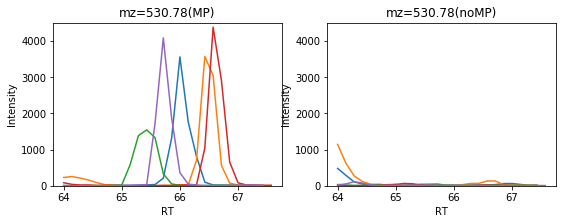

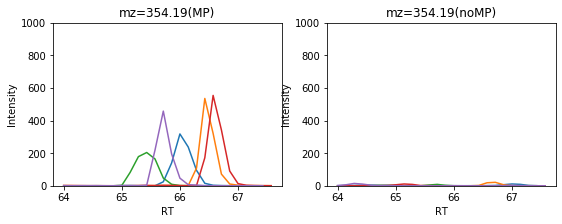

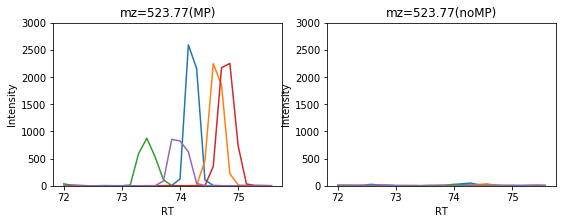

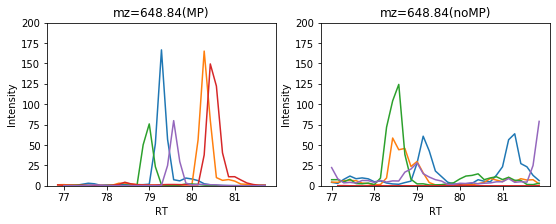

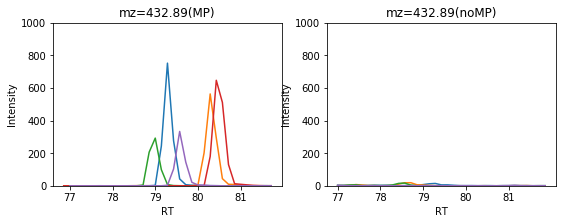

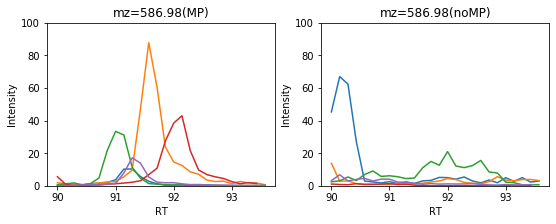

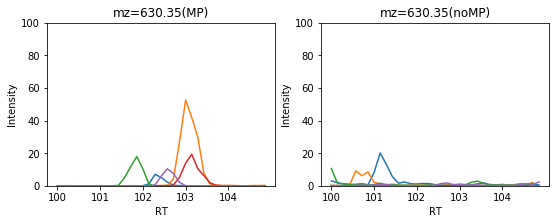

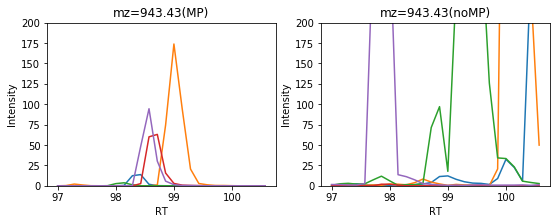

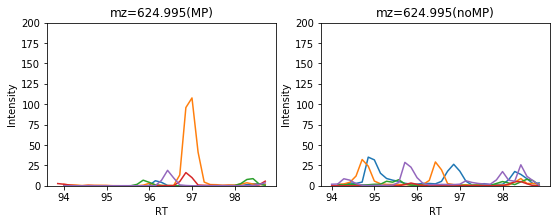

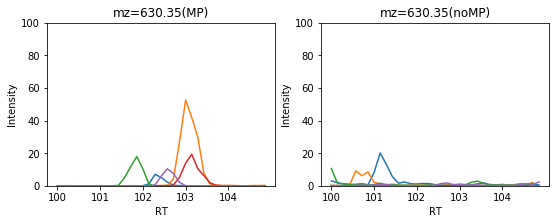

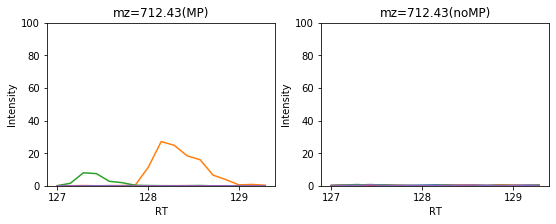

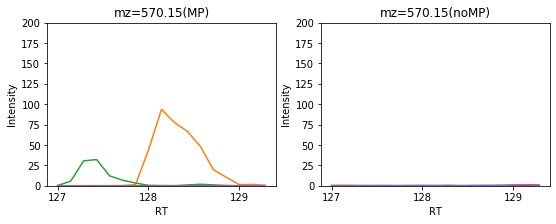

In [125]:
rate=1
plot_spike_contrast(ts=4, te=7, mz=501.25, rate=rate , ylim= 200)
plot_spike_contrast(ts=45, te=49, mz=450.5, rate=rate, ylim= 1000)
plot_spike_contrast(ts=53, te=56, mz=530.78, rate=rate , ylim= 4500)
plot_spike_contrast(ts=53, te=56, mz=354.19, rate=rate , ylim= 1000)
plot_spike_contrast(ts=59, te=62, mz=523.77, rate=rate , ylim= 3000)
plot_spike_contrast(ts=63 , te=67, mz= 648.84, rate=rate , ylim= 200)
plot_spike_contrast(ts=63 , te=67, mz= 432.89, rate=rate , ylim= 1000)
plot_spike_contrast(ts=74, te=77, mz= 586.98 , rate=rate , ylim= 100)
plot_spike_contrast(ts=82 , te=86, mz= 630.35, rate=rate , ylim= 100)
plot_spike_contrast(ts=80 , te=83, mz= 943.43, rate=rate , ylim= 200)
plot_spike_contrast(ts=77 , te=81, mz= 624.995, rate=rate , ylim= 200)
plot_spike_contrast(ts=82 , te=86, mz= 630.35, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 712.43, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 570.15, rate=rate , ylim= 200)
